In [73]:
### Si données locales
library(Matrix)
u.user <- read.csv(file='u.user.csv', sep='|', header=T)
u.item <- read.csv(file='u.item.csv', sep='|', header=T)
u.data <- read.csv(file='u.data.csv', sep='|', header=T)

m.sparse <- sparseMatrix(u.data[,1],u.data[,2],x=u.data[,3])
rownames(m.sparse) <- paste('u', 1:nrow(m.sparse), sep='')
colnames(m.sparse) <- paste('i', 1:ncol(m.sparse), sep='')

m <- as.matrix(m.sparse)                # transforme en matrice ordinaire
m.na <- m
m.na[m.na==0] <- NA

# Cosinus normal des lignes d'une matrice
matrix.cos <- function(m) {
     (m %*% t(m)) / ( t(matrix(sqrt(rowSums(m^2)),nrow(m),nrow(m)))
                    * (sqrt(rowSums(m^2))) )
}
# on normalise les ages
u.user.norm <- u.user
u.user.norm$age = (u.user.norm$age - min(u.user.norm$age)) / (max(u.user.norm$age) - min(u.user.norm$age))

# on normalise les votes
u.data.norm <- u.data
u.data.norm$rating = (u.data.norm$rating - min(u.data.norm$rating)) / (max(u.data.norm$rating) - min(u.data.norm$rating))

m.na.norm <- m.na/5
m.norm <- m/5



In [32]:
mae <- function(m1, m2) mean(abs(m1 - m2), na.rm=T)

In [33]:
head(m)

,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,...,i1673,i1674,i1675,i1676,i1677,i1678,i1679,i1680,i1681,i1682
u1,5,3,4,3,3,5,4,1,5,3,...,0,0,0,0,0,0,0,0,0,0
u2,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
u3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
u4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
u5,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
u6,4,0,0,0,0,0,2,4,4,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# merge users and ratings
names(u.user)<- c('user.id','age','gender','job')
u.user <- u.user[,c(-5)]
head(u.user)

names(u.data)<- c('user.id','movie.id','rating')
u.data <- u.data[,c(-4)]
head(u.data)

u.item <- u.item[,c(-2,-3,-4,-5)]
head(u.item)

u.r <- merge(u.user, u.data, by = "user.id")
head(u.r)
# merge userRating with movie to have actual movie titles instead of ids
u.r.v <- merge(u.r, u.item, by = "movie.id")
head(u.r.v)


user.id,age,gender,job
1,24,M,technician
2,53,F,other
3,23,M,writer
4,24,M,technician
5,33,F,other
6,42,M,executive


user.id,movie.id,rating
196,242,3
186,302,3
22,377,1
244,51,2
166,346,1
298,474,4


movie.id,unknown,Action,Adventure,Animation,Children.s,Comedy,Crime,Documentary,Drama,Fantasy,Film.Noir,Horror,Musical,Mystery,Romance,Sci.Fi,Thriller,War,Western
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


user.id,age,gender,job,movie.id,rating
1,24,M,technician,259,1
1,24,M,technician,264,2
1,24,M,technician,194,4
1,24,M,technician,183,5
1,24,M,technician,40,3
1,24,M,technician,226,3


movie.id,user.id,age,gender,job,rating,unknown,Action,Adventure,Animation,...,Fantasy,Film.Noir,Horror,Musical,Mystery,Romance,Sci.Fi,Thriller,War,Western
1,918,40,M,scientist,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,684,28,M,student,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,660,26,M,student,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,339,35,M,lawyer,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,699,44,M,other,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,94,26,M,student,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
head(u.r.v)

movie.id,user.id,age,gender,job,rating,unknown,Action,Adventure,Animation,...,Fantasy,Film.Noir,Horror,Musical,Mystery,Romance,Sci.Fi,Thriller,War,Western
1,918,40,M,scientist,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,684,28,M,student,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,660,26,M,student,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,339,35,M,lawyer,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,699,44,M,other,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,94,26,M,student,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [87]:
new.m.cv <- function(dimRedu){
# matrice diagonale pour réduire les matrices originales
m.d2 <- diag(c(m.svd$d[1:dimRedu],rep(0,length(m.svd$d)-dimRedu)))
# nouvelle matrice basée sur les deux premières dimensions uniquement
m.svd2 <- round((m.svd$u %*% m.d2 %*% t(m.svd$v)),2)
mae(m.svd2[i.test.c], m.na[i.test.c])
    }
to.plot <- c()

In [ ]:
i.observed <- dim(u.r.v)[1]
set.seed(5)
i.hasard <- sample(seq(1,i.observed,1), i.observed)
fold.size <- round(length(i.hasard) / 5)
i.false <- rep(FALSE, dim(u.r.v)[1])
for (i in 1:5){
fold.number <- i

## Index booléen pour les cellules de test et d'entraînement
i.test.b <- i.false
## Les cellules indexées du replis correspondant sont fixées à TRUE pour le test...
i.test.b[ i.hasard[((fold.number-1) * fold.size):((fold.number) * fold.size)] ] <- TRUE
    

## ...et à FALSE pour l'entraînement
i.train.b <-  !i.test.b
u.r.v.train <- u.r.v[i.train.b,]
u.r.v.test <- u.r.v[i.test.b,]

rf <- randomForest(formula, data = u.r.v.train, ntree = 50)
new.m <- m
i.test.c <- rep(FALSE,943*1682)
for (j in seq_len(fold.size)){
    new.m[u.r.v.test[j,2],u.r.v.test[j,1]]<-0
    i.test.c[943*(u.r.v.test[j,1]-1)+u.r.v.test[j,2]]<-TRUE
}
for (k in seq_len(943)){
    for (l in seq_len(1682)){
        if (new.m[k,l]==0){
            new.m[k,l]<- predict(rf, newdata = cbind(u.item[l,],u.user[k,])) 
        }
    }
}
write.table(new.m,file=paste("rF2_", toString(i), ".csv", sep = "")) # drops the rownames
write.table(i.test.c,file=paste("rFTestc2_", toString(i), ".csv", sep = "")) # drops the rownames
write.table(i.test.b,file=paste("rFTestb2_", toString(i), ".csv", sep = "")) # drops the rownames
m.train <- new.m
m.train <- m.train
m.svd <- svd(m.train)
to.plot<-rbind(to.plot,unlist(lapply(seq(22), new.m.cv)))
    }


In [273]:
m1 <- read.csv(file="out/embed/m1.csv", sep = ",",header = F) # drops the rownames

test1 <- read.csv(file="out/embed/test1.csv", sep = ",",header = F) # drops the rownames
test1 <- unlist(test1)
head(m1)


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1673,V1674,V1675,V1676,V1677,V1678,V1679,V1680,V1681,V1682
5.000000,3.000000,4.000000,3.680093,3.000000,5.000000,4.000000,1.000000,5.000000,3.000000,...,2.835407,3.679684,2.671616,-0.051160641,3.477255,1.167773,3.244720,2.170426,3.470949,0
3.813703,3.320848,2.974110,3.760492,3.243378,3.929181,4.100991,4.272815,4.481664,4.008539,...,2.975694,3.806267,2.838918,-0.049428761,3.429441,1.192586,3.448534,2.231921,3.615580,0
3.094825,2.624814,2.612596,2.800937,2.526471,3.236762,3.306466,3.185602,3.291511,3.267706,...,2.318632,3.014315,2.207250,-0.022069756,2.716269,0.965483,2.683516,1.730359,2.832991,0
4.698557,4.285568,3.919760,4.301870,4.076870,5.240458,5.023038,4.969657,4.886447,4.714648,...,3.621850,4.602409,3.487761,-0.049507760,3.922302,1.477121,4.192695,2.710016,4.442693,0
3.531645,3.000000,2.515902,3.442758,2.826644,3.024717,4.207715,3.757524,3.930134,4.064330,...,2.444457,3.235080,2.326513,0.022351924,3.143711,1.033664,2.832402,1.907776,3.037486,0
4.000000,1.994541,1.968641,3.345500,2.475761,2.942813,3.415770,4.000000,4.000000,4.208599,...,2.397008,3.182631,2.300998,-0.001121117,3.138880,1.009609,2.845124,1.837841,3.006988,0


In [274]:
dim(m1)

[1]  943 1682

In [275]:
i.test.c <- rep(FALSE,943*1682)
for (j in seq_len(length(test1))){
    i.test.c[943*(u.data[test1[j]+1,2]-1)+u.data[test1[j]+1,1]]<-TRUE
}

In [276]:
head(u.data)

user.id,item.id,rating,timestamp
196,242,3,881250949
186,302,3,891717742
22,377,1,878887116
244,51,2,880606923
166,346,1,886397596
298,474,4,884182806


In [277]:
length(i.test.c)

[1] 1586126

In [278]:
sum(i.test.c)

[1] 20000

In [279]:
m1[m1==0]<-NA

In [280]:
m1[is.na(m1)]<-rep(rowMeans(m1,na.rm=T),1682)[is.na(m1)]

In [281]:
m1[943,]<-4

In [282]:
mae(as.matrix(m1)[i.test.c],m.na[i.test.c])

[1] 0.7242744

In [283]:
as.matrix(m1)[i.test.c]

[1]  3.813703e+00  3.531645e+00  3.631789e+00  4.245305e+00  3.418885e+00
    [6]  4.201784e+00  4.204644e+00  3.327429e+00  4.475321e+00  3.922548e+00
   [11]  4.101064e+00  3.688487e+00  4.245145e+00  3.647438e+00  4.171213e+00
   [16]  3.856328e+00  3.768476e+00  4.135458e+00  3.855819e+00  3.955143e+00
   [21]  3.437055e+00  3.503808e+00  3.636525e+00  3.517376e+00  3.461233e+00
   [26]  3.945484e+00  4.701515e+00  4.195701e+00  4.769328e+00  4.297352e+00
   [31]  3.644680e+00  4.255937e+00  4.130571e+00  3.808480e+00  3.209050e+00
   [36]  4.976348e+00  3.897915e+00  3.589736e+00  3.344882e+00  4.059215e+00
   [41]  4.191411e+00  5.271579e+00  4.750485e+00  4.378826e+00  3.667240e+00
   [46]  4.993344e+00  4.369763e+00  3.592691e+00  3.399271e+00  4.136792e+00
   [51]  4.404735e+00  3.764281e+00  4.081472e+00  4.146165e+00  3.827507e+00
   [56]  4.197178e+00  3.546280e+00  3.629256e+00  3.073155e+00  3.719809e+00
   [61]  3.901035e+00  3.903591e+00  3.692101e+00  4.320269e+00  3.380953e+00
   [66]  3.256929e+00  2.749634e+00  3.730631e+00  2.571405e+00  3.642441e+00
   [71]  3.798595e+00  3.862630e+00  4.035377e+00  3.545545e+00  4.313059e+00
   [76]  3.808774e+00  2.805115e+00  3.404321e+00  4.030928e+00  4.532837e+00
   [81]  4.193947e+00  3.384962e+00  4.650344e+00  3.571301e+00  4.265920e+00
   [86]  4.000875e+00  3.117527e+00  4.049040e+00  3.960418e+00  3.537208e+00
   [91]  4.656939e+00  3.348217e+00  3.111607e+00  3.061027e+00  4.144699e+00
   [96]  2.083668e+00  3.923739e+00  3.171473e+00  2.560860e+00  3.243551e+00
  [101]  3.051302e+00  3.714826e+00  3.818539e+00  3.505778e+00  2.499370e+00
  [106]  2.381543e+00  2.278495e+00  3.543155e+00  3.016311e+00  2.536687e+00
  [111]  4.006443e+00  2.721184e+00  3.024556e+00  3.899018e+00  3.433518e+00
  [116]  3.808429e+00  3.236763e+00  3.298232e+00  3.161598e+00  3.302121e+00
  [121]  2.911972e+00  4.000000e+00  2.517997e+00  2.636367e+00  2.899256e+00
  [126]  4.060280e+00  3.153701e+00  3.692764e+00  3.297725e+00  3.081778e+00
  [131]  3.593751e+00  3.064962e+00  3.228485e+00  3.299793e+00  3.703082e+00
  [136]  2.570729e+00  2.765014e+00  3.030135e+00  3.680093e+00  3.980302e+00
  [141]  3.603947e+00  3.454577e+00  3.069358e+00  3.109644e+00  3.240212e+00
  [146]  3.734545e+00  2.613183e+00  4.061934e+00  4.057444e+00  4.163803e+00
  [151]  3.214988e+00  3.795706e+00  3.772129e+00  3.964507e+00  3.061749e+00
  [156]  3.540643e+00  3.313031e+00  3.868569e+00  4.025769e+00  3.234957e+00
  [161]  3.741588e+00  3.511805e+00  3.777164e+00  3.068341e+00  4.143024e+00
  [166]  3.173685e+00  3.320342e+00  3.634856e+00  3.937843e+00  3.237348e+00
  [171]  4.125149e+00  2.955439e+00  3.489548e+00  3.254848e+00  3.385513e+00
  [176]  3.108554e+00  3.009876e+00  3.465724e+00  4.183841e+00  3.397424e+00
  [181]  3.547939e+00  3.538098e+00  3.819096e+00  3.093908e+00  2.448903e+00
  [186]  4.078407e+00  3.658894e+00  4.249460e+00  2.497313e+00  3.299820e+00
  [191]  3.770360e+00  3.820376e+00  3.908688e+00  3.436528e+00  3.162068e+00
  [196]  3.449127e+00  2.638566e+00  4.535726e+00  2.380824e+00  2.641516e+00
  [201]  3.339487e+00  3.299005e+00  3.332854e+00  4.019786e+00  3.210207e+00
  [206]  3.415770e+00  4.219736e+00  3.897142e+00  4.236465e+00  3.927425e+00
  [211]  3.708190e+00  4.293828e+00  3.458753e+00  4.090234e+00  3.439945e+00
  [216]  3.916090e+00  3.954197e+00  4.003347e+00  2.854907e+00  4.037620e+00
  [221]  3.166297e+00  4.490920e+00  4.925725e+00  4.099483e+00  3.585697e+00
  [226]  3.933375e+00  3.473162e+00  4.201823e+00  3.508726e+00  3.503115e+00
  [231]  3.928911e+00  3.145399e+00  3.614346e+00  3.966369e+00  4.622075e+00
  [236]  4.704237e+00  3.881871e+00  3.721817e+00  3.862145e+00  3.820798e+00
  [241]  4.280076e+00  3.660969e+00  4.705632e+00  4.652801e+00  3.084441e+00
  [246]  4.011308e+00  3.705475e+00  3.931446e+00  4.311963e+00  4.186605e+00
  [251]  3.803654e+00  3.567406e+00  4.146571e+00  3.820957e+00  4.028553e+00
  [256]  3.409103e+00  4.1

In [287]:
m.train <- m1
m.train <- m.train
m.svd <- svd(m.train)
to.plot<-unlist(lapply(seq(1,100,5), new.m.cv))

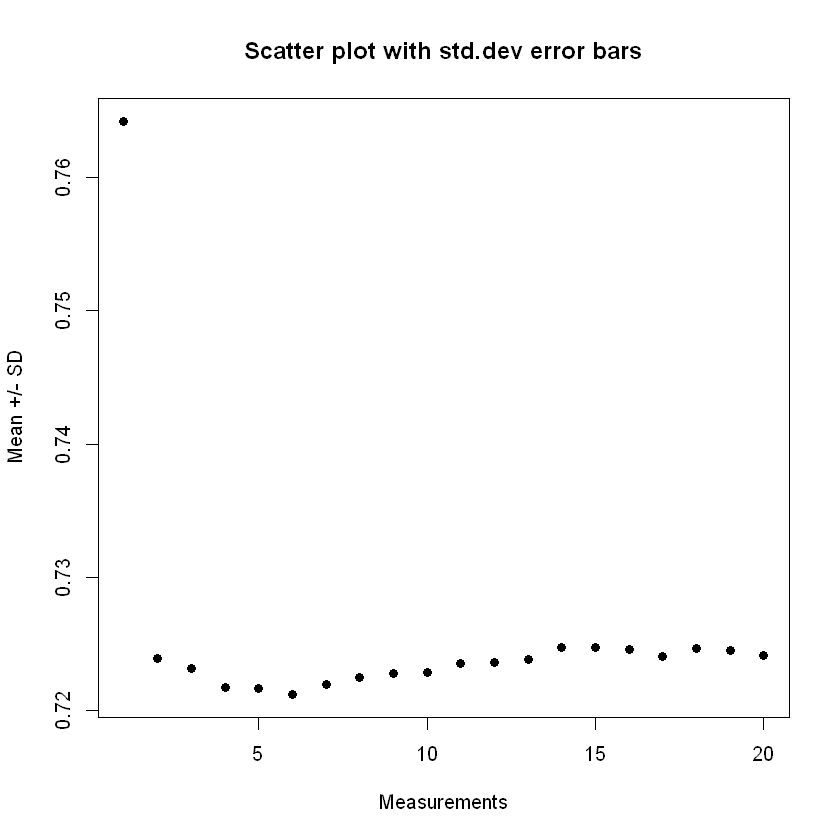

In [288]:
x <- 1:length(to.plot)
plot(x,to.plot,pch=19, xlab="Measurements", ylab="Mean +/- SD",
    main="Scatter plot with std.dev error bars"
)

In [289]:
to.plot

[1] 0.7642155 0.7238895 0.7231580 0.7217380 0.7216515 0.7212025 0.7219505
 [8] 0.7224660 0.7227895 0.7228965 0.7235060 0.7236520 0.7238095 0.7247240
[15] 0.7247490 0.7245930 0.7240815 0.7246660 0.7245075 0.7241155

In [35]:
for (i in 1:5){
m.train <- data.matrix(table[[i]])
i.test.c <- unlist(test[[i]])
print(mae(m.train[i.test.c],m.na[i.test.c]))
m.svd <- svd(m.train)
to.plot<-rbind(to.plot,unlist(lapply(seq(22), new.m.cv)))
    }

[1] 0.81275
[1] 0.828
[1] 0.8174
[1] 0.81555
[1] 0.8102


In [36]:
to.plot<-apply(to.plot,2,unlist)

In [37]:
sdev <- apply(to.plot,2,sd) 
sdev
avg <- colMeans(to.plot)
x <- 1:length(avg)

[1] 0.010116118 0.010545638 0.010305700 0.010191606 0.010553937 0.010722161
 [7] 0.010098071 0.009847578 0.010196786 0.010786920 0.010720130 0.010597891
[13] 0.010445986 0.010419278 0.010398894 0.010628212 0.010551155 0.010713269
[19] 0.010870795 0.010725169 0.010387816 0.009983771

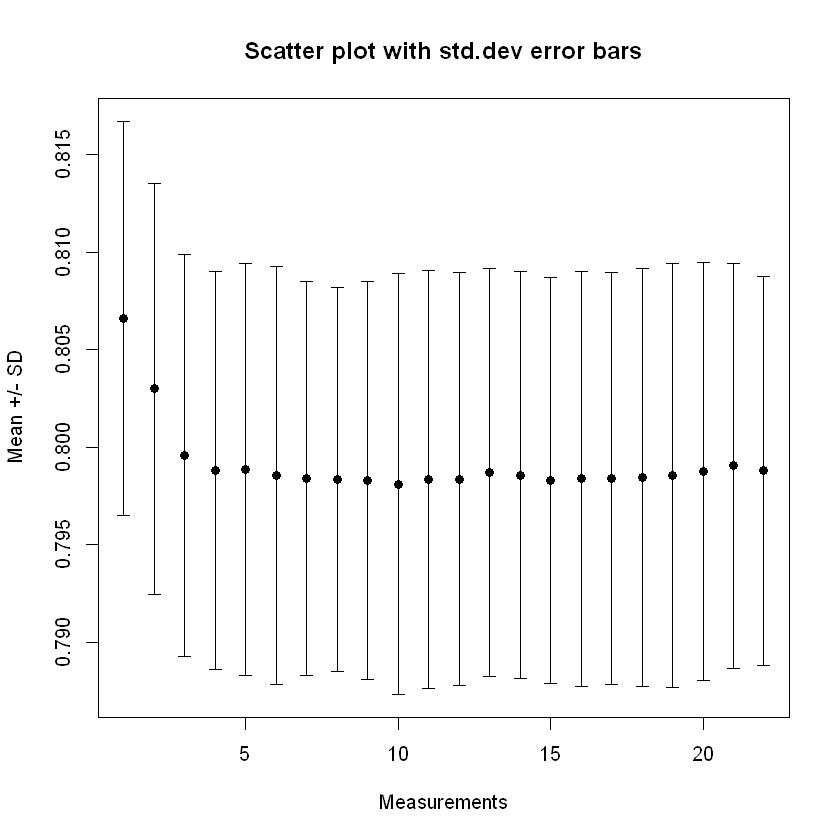

In [38]:
plot(x,colMeans(to.plot),ylim=range(c(avg-sdev, avg+sdev)),pch=19, xlab="Measurements", ylab="Mean +/- SD",
    main="Scatter plot with std.dev error bars"
)
# hack: we draw arrows but with very special "arrowheads"
arrows(x, avg-sdev, x, avg+sdev, length=0.05, angle=90, code=3)

In [33]:
data.matrix(m.train)[i.test.c]

[1] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
   [37] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
   [73] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4
  [109] 4 4 3 4 3 4 3 4 4 4 4 4 3 5 3 3 4 3 3 3 3 3 3 3 3 4 4 3 4 4 5 4 4 4 4 4
  [145] 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [181] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 5 4 4
  [217] 4 4 4 5 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 5 4 4 4 4 4 4
  [253] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 4 4 4 4 4 4 4 4 4
  [289] 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 3 4 4 5 4 4 5 4 4 5 5 4 5 4
  [325] 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4
  [361] 5 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4
  [397] 5 4 4 4 5 4 4 5 4 4 4 5 5 5 5 5 5 5 5 4 5 5 4 4 4 5 5 4 4 5 5 4 4 5 4 4
  [433] 4 4 4 5 4 4 5 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 4 5 4 4 4 4
  [469] 4 4 5 4 4 4 5 4 4 5 2 5 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 3 4
  [505] 4 4 4 4 4 5 4 3 4 4 4 4 4 4 4 3 4 3 4 4 4 3 3 4 3 4 4 4 4 3 3 4 3 3 3 4
  [541] 4 4 3 4 3 4 4 4 4 5 4 4 4 4 5 4 5 4 4 4 4 5 4 4 4 4 4 4 5 4 4 4 4 4 4 4
  [577] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [613] 5 5 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 5 4 4 5 4 4
  [649] 4 4 4 3 4 3 4 3 4 4 4 4 3 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 3 4 4 4 4 4
  [685] 4 4 4 4 4 3 3 3 4 3 3 3 3 2 3 3 3 4 3 3 3 3 5 3 5 4 5 5 4 4 5 4 4 4 4 4
  [721] 4 4 4 5 5 4 5 5 5 5 4 5 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [757] 4 4 4 4 4 4 4 4 4 4 5 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4
  [793] 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 4 3 3 4 3 3 3 3 4 3 4 3 4 3 3 3 3 3 3 3 4
  [829] 3 4 4 4 3 4 3 3 3 3 3 4 2 4 4 3 4 4 3 4 4 4 4 3 3 3 4 4 4 4 3 4 4 4 4 4
  [865] 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 4 3 4 4 4 3 4 3 3 4 3 4 4 4 3 4 4 3 4 4 3
  [901] 3 3 3 3 4 5 3 4 4 2 4 4 4 3 4 3 3 3 4 3 4 4 4 4 3 3 4 3 4 4 3 4 4 3 3 4
  [937] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4
  [973] 4 4 4 4 4 4 3 3 3 3 2 2 2 3 3 3 3 3 3 2 3 3 3 5 3 3 3 3 4 4 3 3 4 4 5 4
 [1009] 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 4 4 5 5 5 5 4 5 4 4 4 4 4 4 4 4 4
 [1045] 4 4 5 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 4 4 4 4 4 2 3 3 3 3 3 3 5 4
 [1081] 3 3 5 3 3 3 4 3 3 4 4 3 3 4 4 4 4 4 4 3 3 4 2 3 3 3 4 4 2 4 4 4 3 4 4 4
 [1117] 4 4 4 4 4 4 3 3 3 4 4 4 4 3 4 4 4 4 4 3 4 4 3 3 4 3 3 4 4 3 4 4 3 3 4 3
 [1153] 4 4 4 4 3 4 4 4 5 4 4 4 4 4 4 4 4 4 5 5 4 4 4 4 5 4 4 4 4 5 5 4 4 4 4 4
 [1189] 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1225] 5 4 4 5 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 3 3 5
 [1261] 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1297] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1333] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1369] 5 5 5 5 5 5 5 5 5 5 5 4 4 5 4 4 3 4 5 4 4 5 4 4 5 3 4 4 4 4 4 5 5 3 4 4
 [1405] 4 4 4 4 4 4 4 4 4 4 4 3 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1441] 4 4 4 4 4 4 4 4 4 5 4 5 4 5 4 4 4 4 4 4 4 3 4 4 4 4 4 5 4 4 4 4 4 4 4 4
 [1477] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 4 4 4 5 5 4 5 5 4 4 5
 [1513] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 4 4 5 5 5 5 5 5 4 5 5 5 4 5 5 4 5
 [1549] 5 5 5 5 4 5 4 4 5 4 5 5 4 5 5 5 5 5 5 5 4 5 4 5 5 5 5 5 5 4 3 4 5 5 4 4
 [1585] 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 5 4 4 4 4 5 4 4 4 3 4 4 5 4 4 5 4 4
 [1621] 4 4 4 4 4 4 4 4 4 5 3 4 5 5 4 4 4 4 4 4 4 4 5 4 3 3 5 5 4 4 4 4 4 4 4 4
 [1657] 5 4 5 4 4 4 5 4 5 4 4 4 4 2 3 4 3 3 3 5 4 4 3 3 5 3 4 3 4 3 3 4 3 4 3 3
 [1693] 4 4 5 3 4 4 4 3 4 4 4 4 3 3 4 4 4 5 4 5 5 4 5 4 4 4 4 5 4 4 4 4 4 4 4 4
 [1729] 4 4 5 5 4 4 4 4 5 5 5 5 5 4 4 4 4 5 4 4 4 5 4 4 4 4 5 4 5 5 4 4 5 4 5 4
 [1765] 4 4 4 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 5 4
 [18

In [25]:
length(i.test.c)

[1] 1586126

In [26]:
dim(m.train)

[1]  943 1682

In [27]:
943*1682

[1] 1586126